<a href="https://colab.research.google.com/github/prishi29/Machine_Learning/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MULTIPLE LINEAR REGRESSION


In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading the dataset
df = pd.read_csv("/content/Cellphone.csv")

In [ ]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [ ]:
print("The shape of the dataset is: ",df.shape)

The shape of the dataset is:  (161, 14)


In [ ]:
#Checking missing values
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

There are no missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [ ]:
df.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

Here Product_id and sales is not required. Hence we drop these columns

In [ ]:
df1=df.drop(['Product_id'],axis=1)

In [ ]:
df1.head(1)

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.0,13.0,8.0,2610,7.4


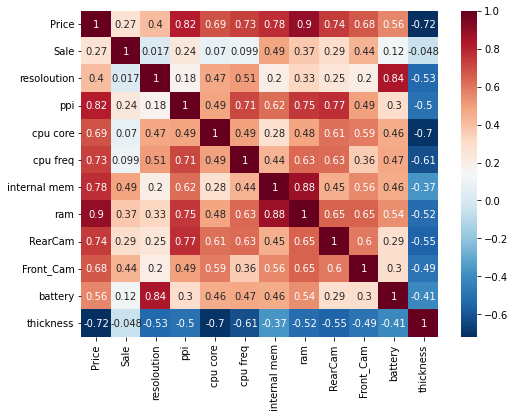

In [191]:
#Checking the correlation between the attributes
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(),annot=True,cmap="RdBu_r");

1. Price of cellphone has highest positive correlation with "Ram" i.e. Higher the "RAM" higher is the price.
2. Price of cellphone has highest negative correlation with "thickness" i.e. Higher the "thickness" lower is the price.
3. We also see that Weight has least correlation with Price and hence, we can drop this column.

In [ ]:
df1=df1.drop(['weight'],axis=1)

In [ ]:
# Dividing our target variable and features
x = df1.drop(['Price'],axis=1)
y = df1['Price']



1.   Price is our target variable
2.   All other variables are our features



## Training the Model

In [ ]:
#Splitting the training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

In [ ]:
#Training our model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
print("Model Trained Successful")

Model Trained Successful


## Predicting the Values

In [ ]:
#Predicting the values on test dataset
y_pred = lr.predict(x_test)
y_pred

array([2935.50249598,  906.5820407 , 1766.844721  , 2260.54906417,
       2987.33061635, 2528.15662581, 1849.13668119, 2891.23970063,
       1500.12845544,  950.76213241, 2224.38980591, 1891.47939936,
       1823.56728655, 3244.70945726, 3527.31122182, 1321.8719402 ,
       1322.35888062, 2445.17004966, 2662.34671704, 1632.71824741,
       2062.41951768, 3390.49142309, 1505.80960577, 1371.13779379,
       2207.08665311, 2739.87127513, 3016.80957473, 2891.42230329,
       1435.96673793, 1849.2584163 , 2399.35577166, 2258.5112098 ,
       1981.8445716 ])

In [ ]:
#Printing the actual and predicted values along with the difference
compare = pd.DataFrame({'Actual Price':y_test,"Predicted Price" : y_pred,"Difference": y_test-y_pred})
compare.head()

,Actual Price,Predicted Price,Difference
111,2975,2935.502496,39.497504
113,754,906.582041,-152.582041
144,1921,1766.844721,154.155279
7,2137,2260.549064,-123.549064
44,2859,2987.330616,-128.330616


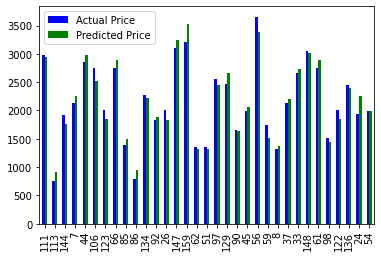

In [ ]:
#Plotting the compared data
compare1 = pd.DataFrame({'Actual Price':y_test,"Predicted Price" : y_pred})
compare1.plot(kind="bar", color =['Blue','Green'])
plt.show()

In [ ]:
coeff_intercept = {'Features':['Sale', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
          'Coefficients': lr.coef_,'Intercept':lr.intercept_}
coeff_intercept_df = pd.DataFrame(coeff_intercept).sort_values(by=['Coefficients'],ascending=False)
coeff_intercept_df

,Features,Coefficients,Intercept
4,cpu freq,140.501967,1851.344445
6,ram,73.484341,1851.344445
3,cpu core,44.983204,1851.344445
8,Front_Cam,8.958316,1851.344445
7,RearCam,7.353589,1851.344445
5,internal mem,6.951821,1851.344445
2,ppi,1.139423,1851.344445
9,battery,0.123902,1851.344445
0,Sale,-0.020289,1851.344445
10,thickness,-80.411109,1851.344445


#Model Evaluation

In [ ]:
#Lets check the accuracy of the model
from sklearn import metrics
mea = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
R2 = np.round(metrics.r2_score(y_test,y_pred)*100,6)

In [ ]:
print("Mean Absolute Error:",mea)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R-Squared:", R2,"%")

Mean Absolute Error: 123.68590068450534
Mean Squared Error: 21974.290062128257
Root Mean Squared Error: 148.23727622338538
R-Squared: 95.314368 %


## Plotting the Graph

In [ ]:
df1.columns

Index(['Price', 'Sale', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
       'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

In [ ]:
cols = df1[['Sale', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
       'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']]

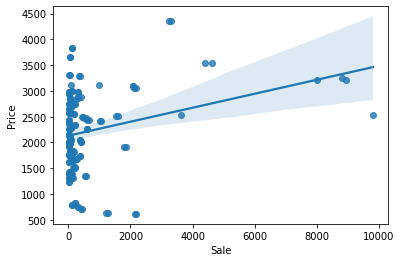

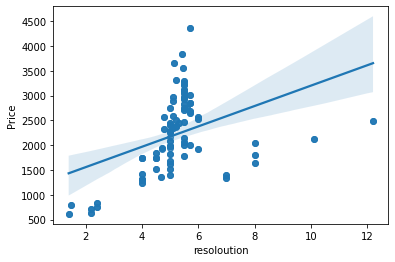

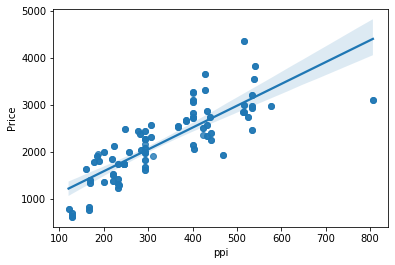

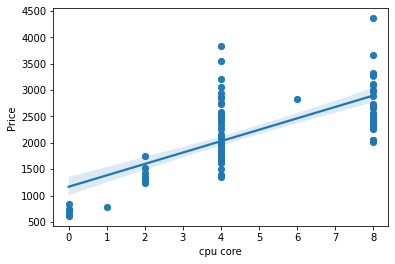

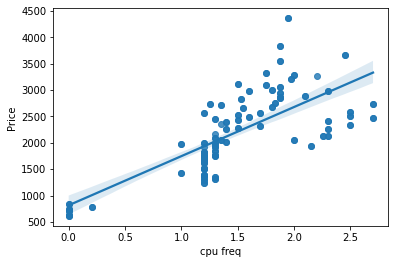

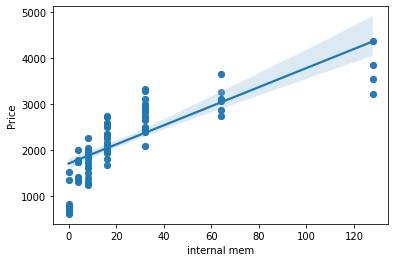

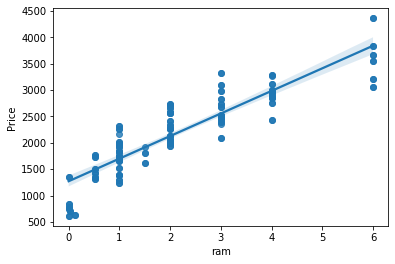

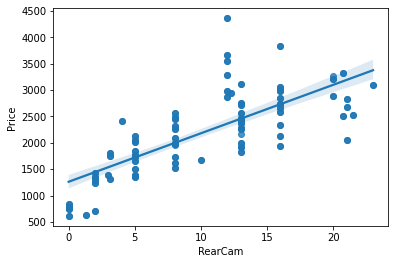

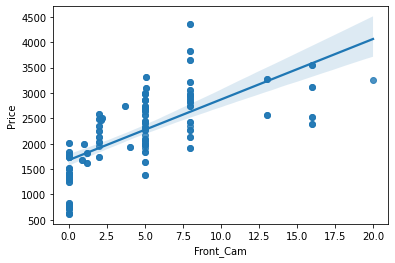

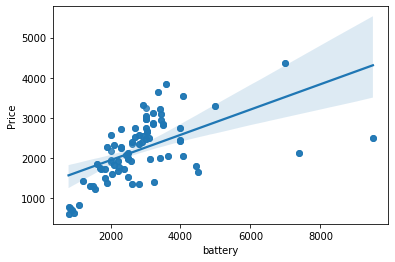

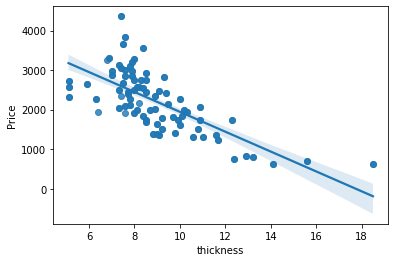

In [ ]:
for i in cols:
  plt.figure()
  sns.regplot(x[i],y)
  plt.xlabel(i)
  plt.ylabel('Price')
  plt.show()
